# Homework5
## Jiaqi Ma
## USC ID: 3028009001

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df[:5]

,x1,x2,y
0,-0.234491,0.054177,1
1,-0.127876,0.188275,0
2,0.072853,0.158058,0
3,0.408208,0.163343,1
4,-0.298318,-0.027766,1


In [5]:
y = df['y']

In [6]:
X = df.drop(columns = 'y')

In [7]:
y[:5]

0    1
1    0
2    0
3    1
4    1
Name: y, dtype: int64

In [8]:
X[:5]

,x1,x2
0,-0.234491,0.054177
1,-0.127876,0.188275
2,0.072853,0.158058
3,0.408208,0.163343
4,-0.298318,-0.027766


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    random_state = 0,
                                                    test_size = 0.6)

a) Make a scatterplot of X1 (x-axis) vs X2 (y-axis) for the train set only. Use red color for rows with y=1, otherwise black color. This plot shows the data points we want to classify.

In [10]:
y_train

296    1
175    1
354    1
396    0
158    0
      ..
260    0
156    0
337    0
61     0
73     0
Name: y, Length: 200, dtype: int64

In [11]:
X_train

,x1,x2
296,-0.400831,-0.262735
175,0.395445,-0.080027
354,0.481018,-0.282178
396,0.159821,0.093595
158,-0.222244,0.251504
...,...,...
260,0.023986,0.277145
156,0.029631,-0.306216
337,-0.343286,0.372975
61,-0.206397,-0.367172


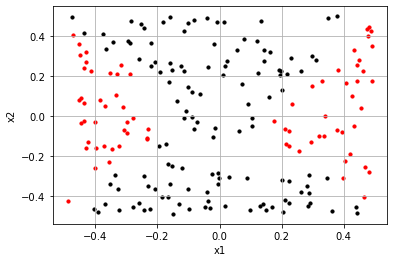

In [12]:
for i in y_train.index:
    if y_train[i] == 1:
        plt.scatter(X_train['x1'][i], X_train['x2'][i], c = 'r', s = 10)
    else:
        plt.scatter(X_train['x1'][i], X_train['x2'][i], c = 'k', s = 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

b) Function LogisticRegression( ) can be used with argument C for regularization. C is equal to the inverse of the shrinkage parameter α. Therefore α = 0 (no regularization) is accomplished by using a large value of C, for instance C=1e20. Fit a logistic regression model (using predictors x1 and x2) with no regularization using LogisticRegression(solver=’lbfgs’,C=1e20) to the train set and report the test accuracy rate.

In [13]:
model1 = LogisticRegression(solver = 'lbfgs', C = 1e20)

In [14]:
model1.fit(X_train, y_train)

LogisticRegression(C=1e+20)

In [15]:
yhat1 = model1.predict(X_test)

In [16]:
# test accuracy rate
model1.score(X_test, y_test)

0.63

c) Use X = PolynomialFeatures().fit_transform(X) to expand X with columns x21, x2, and x1x2 as additional predictors (in addition to a column of ones). Report the top five rows of X.

In [17]:
X = PolynomialFeatures().fit_transform(X)

In [18]:
X = pd.DataFrame(X)

In [19]:
X.columns = ['1', 'x1', 'x2', 'x1^2', 'x1x2', 'x2^2']

In [20]:
X[:5]

,1,x1,x2,x1^2,x1x2,x2^2
0,1.0,-0.234491,0.054177,0.054986,-0.012704,0.002935
1,1.0,-0.127876,0.188275,0.016352,-0.024076,0.035448
2,1.0,0.072853,0.158058,0.005308,0.011515,0.024982
3,1.0,0.408208,0.163343,0.166634,0.066678,0.026681
4,1.0,-0.298318,-0.027766,0.088994,0.008283,0.000771


d) Use random_state = 0 to split the rows of this expanded dataset, into a train (40%) and a test set. Build a logistic regression model with no regularization using C=1e20. Find the test accuracy rate and the confusion matrix (cross tabulation table) for the test set. This matrix compares the predictions with the true Y values.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    random_state = 0,
                                                    test_size = 0.6)

In [22]:
model2 = LogisticRegression(solver = 'lbfgs', C = 1e20)

In [23]:
model2.fit(X_train, y_train)

LogisticRegression(C=1e+20)

In [24]:
yhat2 = model2.predict(X_test)

In [25]:
# test accuracy rate
model2.score(X_test, y_test)

0.99

In [26]:
# confusion matrix
cm = pd.crosstab(yhat2, y_test)
cm.index.name = 'prediction'
cm

y,0,1
prediction,,
0,189,3
1,0,108


e) Use holdout cross validation to find the value of C that yields the largest test accuracy rate. Report this value and the new test accuracy rate.

In [27]:
C = 10**np.linspace(10,-2,100)

In [28]:
model = LogisticRegression(solver = 'lbfgs')

In [29]:
accuracy = []

In [30]:
for c in C:
    model.set_params(C = c)
    model.fit(X_train, y_train)
    accuracy.append(model.score(X_test, y_test))

In [31]:
df = pd.DataFrame(accuracy)
df.columns = ['accuracy']
df.index = C
df.index.name = 'C'
df

,accuracy
C,
1.000000e+10,0.986667
7.564633e+09,0.986667
5.722368e+09,0.986667
4.328761e+09,0.986667
3.274549e+09,0.986667
...,...
3.053856e-02,0.630000
2.310130e-02,0.630000
1.747528e-02,0.630000


Text(0, 0.5, 'accuracy')

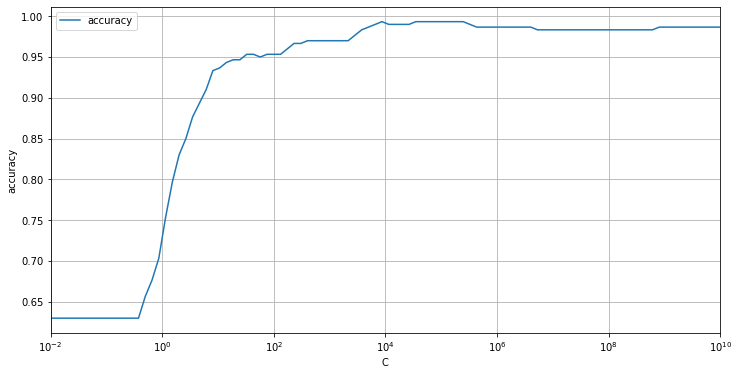

In [32]:
df.plot(figsize = (12,6), grid = True, logx = True, xlim = (10**-2,10**10))
plt.ylabel('accuracy')

In [33]:
# the values of C that yield the largest test accuracy rate
# the largest test accuracy is 0.993333
df[df['accuracy'] == df['accuracy'].max()]

,accuracy
C,
247707.635599,0.993333
187381.742286,0.993333
141747.416293,0.993333
107226.722201,0.993333
81113.083079,0.993333
61359.072734,0.993333
46415.888336,0.993333
35111.917342,0.993333
8697.490026,0.993333
